# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:  Aaron Pelton

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Imports

In [1]:
import requests
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

## Question 1 - Week 7 Project

In [2]:
# 1. URL of the article
url = 'https://www.boltonusa.com/understanding-fed-rate-cut/'

# 2. Fetch the webpage
response = requests.get(url)
response.raise_for_status()  # Raise error for bad responses

# 3. Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# 4. Try to extract the article tag (common structure)
article = soup.find('article')

# Fallback: If no <article> tag, fall back to main content heuristics
if not article:
    article = soup.find('div', {'id': 'main'}) or soup.find('div', class_='content')

# 5. Store the HTML string
html_content = str(article) if article else ''

# 6. Dump to a Pickle file
with open('article.pkl', 'wb') as f:
    pickle.dump(html_content, f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

## Question 2 - Week 7 Project

In [8]:
# 1. Load the HTML from the .pkl file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# 3. Extract and print the text
text = soup.get_text(separator='\n', strip=True)
print(text)

# 4. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed
nlp.add_pipe('spacytextblob')

# 5. Process the text
doc = nlp(text)

# 6. Print sentiment scores
print("\nSentiment:")
print("Polarity:", doc._.blob.polarity)
print("Subjectivity:", doc._.blob.subjectivity)

# 7. Count and print number of sentences
num_sentences = len(list(doc.sents))
print("Number of sentences in the article:", num_sentences)


News
Understanding a Fed Rate Cut
By Bolton
•
October 18th, 2019
With the Federal Reserve Board of Governors’ (The Fed) recent decision to further cut interest rates, we would like to take the opportunity to shed light on what it means when the Fed cuts rates, why the rates are cut and the importance of understanding the potential impacts of this decision.
What
does it mean when the Fed cuts interest rates?
When the Fed cuts interest rates they are lowering the fed funds target rate. This is the rate banks charge each other when lending money overnight to meet the federal reserve requirement. This is important because a number of other interest rates utilize the target rate as a reference point. One of the most significant rates influenced is the prime rate, or the rate that banks charge their best customers.
Why does the Fed cut rates?
The Fed has a few tools at its disposal in order to enact monetary policy: open market operations (the buying and selling of securities to increase or 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

## Question 3 - Week 7 Project

In [9]:
# 1. Load HTML content from the pickle file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# 3. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed

# 4. Process the text
doc = nlp(text)

# 5. Filter tokens: remove stopwords, punctuation, and whitespace
filtered_tokens = [
    token.text.lower() for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]

# 6. Count token frequencies
token_freq = Counter(filtered_tokens)

# 7. Get the 5 most common tokens
most_common = token_freq.most_common(5)

# 8. Print results
print("Top 5 Most Frequent Tokens:")
for token, freq in most_common:
    print(f"  Token: '{token}'  —  Frequency: {freq}")

Top 5 Most Frequent Tokens:
  Token: 'rates'  —  Frequency: 14
  Token: 'interest'  —  Frequency: 11
  Token: 'fed'  —  Frequency: 10
  Token: 'rate'  —  Frequency: 8
  Token: 'cut'  —  Frequency: 6


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

## Question 4 - Week 7 Project

In [11]:
# 1. Load HTML content from the pickle file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Parse the HTML and extract text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# 3. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed

# 4. Process the text
doc = nlp(text)

# 5. Filter tokens and get lowercase lemmas
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]

# 6. Count lemma frequencies
lemma_freq = Counter(filtered_lemmas)

# 7. Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# 8. Print results
print("Top 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"  Lemma: '{lemma}'  —  Frequency: {freq}")

Top 5 Most Frequent Lemmas:
  Lemma: 'rate'  —  Frequency: 22
  Lemma: 'interest'  —  Frequency: 11
  Lemma: 'fed'  —  Frequency: 10
  Lemma: 'cut'  —  Frequency: 10
  Lemma: 'reserve'  —  Frequency: 5


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 5 - Week 7 Project

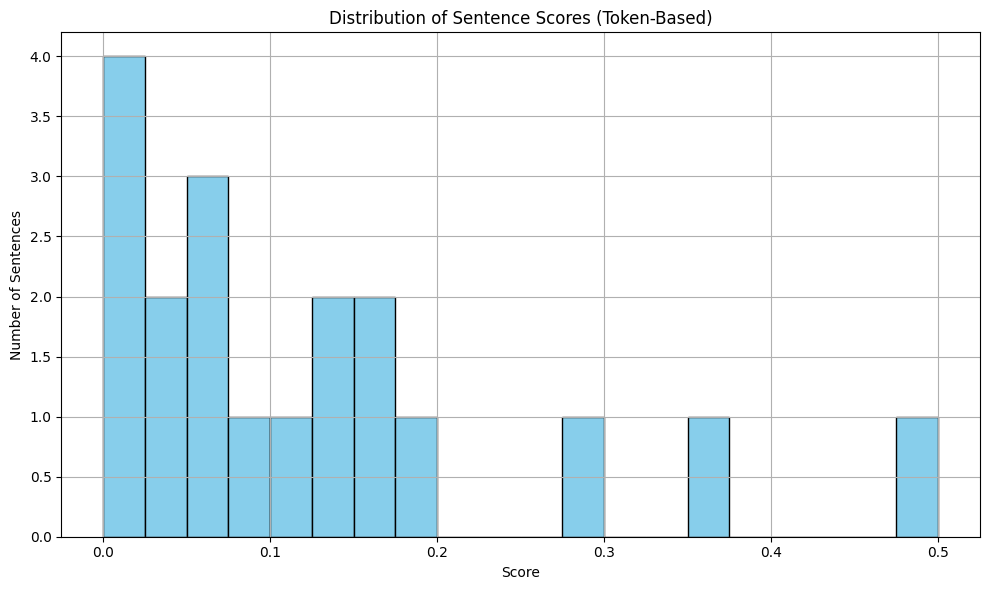

In [13]:
# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Load article HTML from .pkl
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# Extract raw text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# Process entire document
doc = nlp(text)

# Example most_common tokens — you should generate this earlier in your code
from collections import Counter
filtered_tokens = [
    token.text.lower()
    for token in doc
    if not (token.is_stop or token.is_punct or token.is_space)
]
most_common = Counter(filtered_tokens).most_common(5)
interesting_tokens = [t[0] for t in most_common]

# Scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0.0
    interesting_count = sum(1 for word in words if word in interesting_tokens)
    return interesting_count / len(words)

# Score each sentence
scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentence Scores (Token-Based)")
plt.xlabel("Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# The most common range of token scores is 0 to 0.2.  This is a higher range than Week's 6 article token score.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6 - Week 7 Project

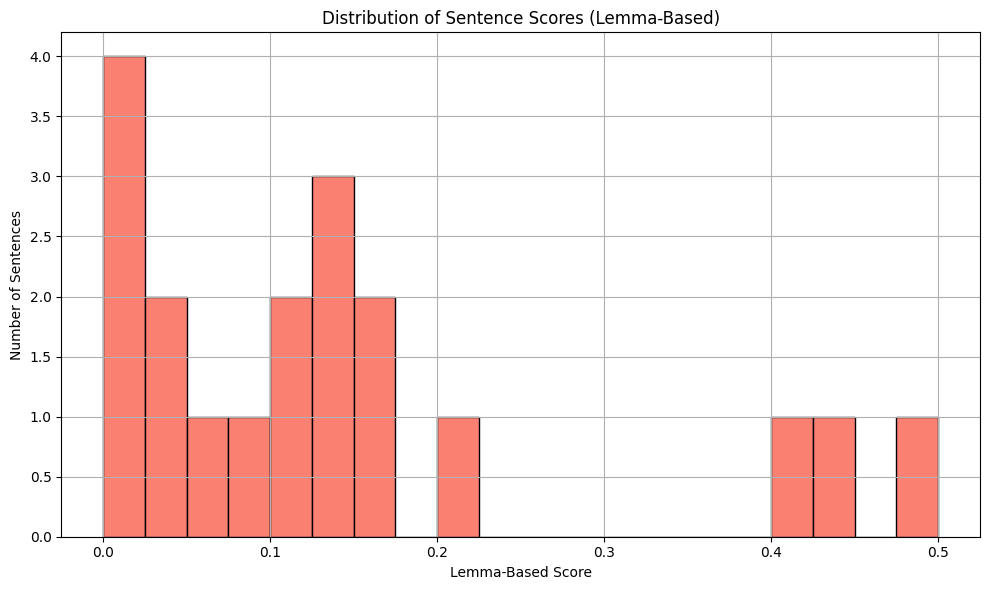

In [15]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# 1. Load the article HTML from the .pkl
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# 2. Extract article text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator=' ', strip=True)

# 3. Process the full document
doc = nlp(text)

# 4. Get interesting lemmas (e.g., top 5 frequent meaningful lemmas)
filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
most_common_lemmas = Counter(filtered_lemmas).most_common(5)
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]

# 5. Define scoring function using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if not lemmas:
        return 0.0
    match_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return match_count / len(lemmas)

# 6. Score all sentences in the article
lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# 7. Plot histogram of lemma-based sentence scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Sentence Scores (Lemma-Based)")
plt.xlabel("Lemma-Based Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# The most common range of lemma scores is 0 to 0.175.

## Question 7 - Week 7 Project

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.1
* Cutoff Score (lemmas): 0.125

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 8 - Week 7 Project

In [19]:
# Load HTML
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# Parse HTML
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator='\n', strip=True)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

# Example list of interesting tokens (you should define your own based on context)
interesting_tokens = {'rates', 'interest', 'fed', 'rate', 'cut'}

# Scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0.0
    interesting_count = sum(1 for word in words if word in interesting_tokens)
    return interesting_count / len(words)

# Score each sentence
scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in doc.sents]

# Cutoff score (this is just an example — replace with your actual value from Q8)
cutoff_score = 0.1  # You can calculate this dynamically if needed

# Build summary
summary_sentences = []
for sent, score in zip(doc.sents, scores):
    if score > cutoff_score:
        summary_sentences.append(sent.text.strip())

# Join summary
summary_token = ' '.join(summary_sentences)

# Output
print("Summary based on Tokens:")
print(summary_token)

Summary based on Tokens:
News
Understanding a Fed Rate Cut
By Bolton
•
October 18th, 2019
With the Federal Reserve Board of Governors’ (The Fed) recent decision to further cut interest rates, we would like to take the opportunity to shed light on what it means when the Fed cuts rates, why the rates are cut and the importance of understanding the potential impacts of this decision. What
does it mean when the Fed cuts interest rates? When the Fed cuts interest rates they are lowering the fed funds target rate. This is important because a number of other interest rates utilize the target rate as a reference point. One of the most significant rates influenced is the prime rate, or the rate that banks charge their best customers. Why does the Fed cut rates? Some of the positive impacts from lowering interest rates are:
Lower borrowing rates for both consumers and businesses. Retirees living off interest payments could look to cut spending to avoid tapping into principal.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 9 - Week 7 Project

In [ ]:
# 1. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed
nlp.add_pipe('spacytextblob')

# 2. Process the text
doc = nlp(summary_token)

# 3. Print sentiment scores
print("\nSentiment:")
print("Polarity:", doc._.blob.polarity)
print("Subjectivity:", doc._.blob.subjectivity)

# 4. Count and print number of sentences
num_sentences = len(list(doc.sents))
print("Number of sentences in the article:", num_sentences)


Sentiment:
Polarity: 0.22407024793388428
Subjectivity: 0.6120867768595041
Number of sentences in the article: 8


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 10 - Week 7 Project

In [22]:
# Load HTML
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# Parse HTML
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text(separator='\n', strip=True)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

# Define interesting lemmas (lowercase!)
# Example: words like "economy", "invest", "grow", etc.
interesting_lemmas = {'rate', 'interest', 'fed', 'cut', 'reserve'}

# Scoring function using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    if not lemmas:
        return 0.125
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas)

# Score each sentence
scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in doc.sents]

# Optional: Set cutoff dynamically (e.g. average score)
cutoff_score = sum(scores) / len(scores)

# Build summary
summary_sentences = []
for sent, score in zip(doc.sents, scores):
    if score > cutoff_score:
        summary_sentences.append(sent.text.strip())

# Create final summary
summary_lemma = ' '.join(summary_sentences)

# Output
print("Summary based on Lemmas:")
print(summary_lemma)

Summary based on Lemmas:
News
Understanding a Fed Rate Cut
By Bolton
•
October 18th, 2019
With the Federal Reserve Board of Governors’ (The Fed) recent decision to further cut interest rates, we would like to take the opportunity to shed light on what it means when the Fed cuts rates, why the rates are cut and the importance of understanding the potential impacts of this decision. What
does it mean when the Fed cuts interest rates? When the Fed cuts interest rates they are lowering the fed funds target rate. This is important because a number of other interest rates utilize the target rate as a reference point. One of the most significant rates influenced is the prime rate, or the rate that banks charge their best customers. Why does the Fed cut rates? Some of the positive impacts from lowering interest rates are:
Lower borrowing rates for both consumers and businesses.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 11 - Week 7 Project

In [23]:
# 1. Load a spaCy language model
nlp = spacy.load('en_core_web_sm')  # Make sure this model is installed
nlp.add_pipe('spacytextblob')

# 2. Process the text
doc = nlp(summary_lemma)

# 3. Print sentiment scores
print("\nSentiment:")
print("Polarity:", doc._.blob.polarity)
print("Subjectivity:", doc._.blob.subjectivity)

# 4. Count and print number of sentences
num_sentences = len(list(doc.sents))
print("Number of sentences in the article:", num_sentences)


Sentiment:
Polarity: 0.22407024793388428
Subjectivity: 0.6120867768595041
Number of sentences in the article: 7


## Question 12 - Week 7 Project

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity of the whole article was .11 while the summaries were .22.  I agree that the summary looks more positive than the whole article.  I think this is because the negative setences were not included.

## Question 13 - Week 7 Project

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The token summary just had one more sentence.  The additional sentence did have a key point.  So I think the token summary was better.